In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

In [34]:
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000)
x = np.concatenate((x_1, x_2))
print(x)

[-4.45050188 -5.78350524 -5.62216831 ...  1.68209881 -0.29935593
  6.18271703]


In [30]:
np.histogram(x, bins=16)

(array([  25,  382, 1429, 1264,  582,  696, 1039, 1266, 1226,  935,  646,
         299,  140,   52,   14,    5]),
 array([-8.93088863, -7.54068698, -6.15048532, -4.76028367, -3.37008201,
        -1.97988035, -0.5896787 ,  0.80052296,  2.19072461,  3.58092627,
         4.97112792,  6.36132958,  7.75153124,  9.14173289, 10.53193455,
        11.9221362 , 13.31233786]))

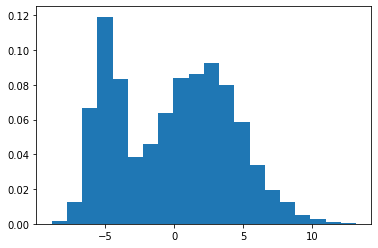

In [35]:
plt.hist(x, bins=20, density=1)
plt.show()

In [4]:
x_1.mean()

-4.988797837391531

In [5]:
x_1.var()

0.9713538911878116

In [7]:
x_2.mean()

1.9791390166920781

In [8]:
x_2.var()

9.026718533487772

### Percentage of data in x_1 in x

In [11]:
len(x_1)/len(x)

0.3

In [12]:
len(x_2)/len(x)

0.7

### Gaussian Mixture Model

In [36]:
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))
print('Means of 2 normal distributions:')
print(gmm.means_)
print('Covariances: ')
print(gmm.covariances_)
print('Weights: ')
print(gmm.weights_)

Means of 2 normal distributions:
[[-4.90686956]
 [ 2.09041385]]
Covariances: 
[[[1.13570022]]

 [[8.59542831]]]
Weights: 
[0.31552902 0.68447098]


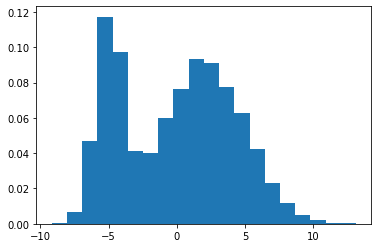

In [25]:
z = gmm.sample(10000)
plt.hist(z[0], bins=20, density=1)
plt.show()

## Kernal Density Estimation (KDE)

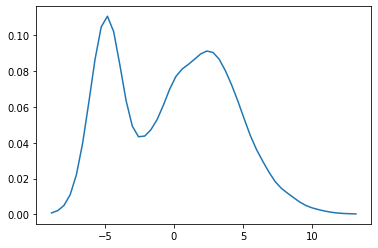

In [40]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(log_pdf))

In [42]:
def pearson_corr(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sum(den_2)
    return correlation_x_y

print(pearson_corr(x_1, x_2))

4.060997258306743e-05


### difference between crosstab correlation and this kind; crosstab is catagorical and this is numerical